In [179]:
%pylab inline

import torch

import tqdm
import cv2
import seaborn as sns

plt.style.use('seaborn')
rcParams['axes.grid'] = False
rcParams['figure.figsize'] = (10,6)

Populating the interactive namespace from numpy and matplotlib


In [346]:
# I consolidated the pre-processing and training routines, and the model arch all in one script.
import dogs
from importlib import reload
reload(dogs)

<module 'dogs' from '/Users/isaacdrachman/GitHub/ML-Projects/dogs.py'>

# Dog Breed Classification

Stanford Dogs Dataset from https://www.kaggle.com/jessicali9530/stanford-dogs-dataset

In [113]:
# Load & crop images and setup datasets.
images, trainset, testset, breeds = dogs.setup()

100%|██████████| 121/121 [01:21<00:00,  1.48it/s]
120it [00:00, 394.62it/s]


In [349]:
# Setup model and optimizer
model = dogs.Model(len(breeds))

# Load saved state.
#model.load_state_dict(torch.load('dogs.pt'))

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [350]:
# This function can be called successively to train further.
losses, accuracies = dogs.train_many(30, model, optimizer, trainset, testset)

[1 /30]	 train loss: 4.6479 test loss: 4.3985 train accuracy:  2.6% test accuracy:  8.0%
[2 /30]	 train loss: 4.2849 test loss: 4.1321 train accuracy:  6.3% test accuracy: 10.0%
[3 /30]	 train loss: 4.0859 test loss: 4.1296 train accuracy:  9.3% test accuracy:  9.0%
[4 /30]	 train loss: 3.9018 test loss: 4.0773 train accuracy: 12.0% test accuracy: 10.0%
[5 /30]	 train loss: 3.7163 test loss: 3.8698 train accuracy: 15.6% test accuracy: 12.0%
[6 /30]	 train loss: 3.5404 test loss: 3.9279 train accuracy: 19.1% test accuracy: 15.0%
[7 /30]	 train loss: 3.3714 test loss: 3.8581 train accuracy: 22.8% test accuracy: 13.0%
[8 /30]	 train loss: 3.2228 test loss: 3.8618 train accuracy: 25.4% test accuracy: 15.0%
[9 /30]	 train loss: 3.0576 test loss: 3.6635 train accuracy: 28.6% test accuracy: 21.0%
[10/30]	 train loss: 2.8949 test loss: 3.6442 train accuracy: 31.1% test accuracy: 24.0%
[11/30]	 train loss: 2.7472 test loss: 3.6181 train accuracy: 35.1% test accuracy: 25.0%
[12/30]	 train loss: 

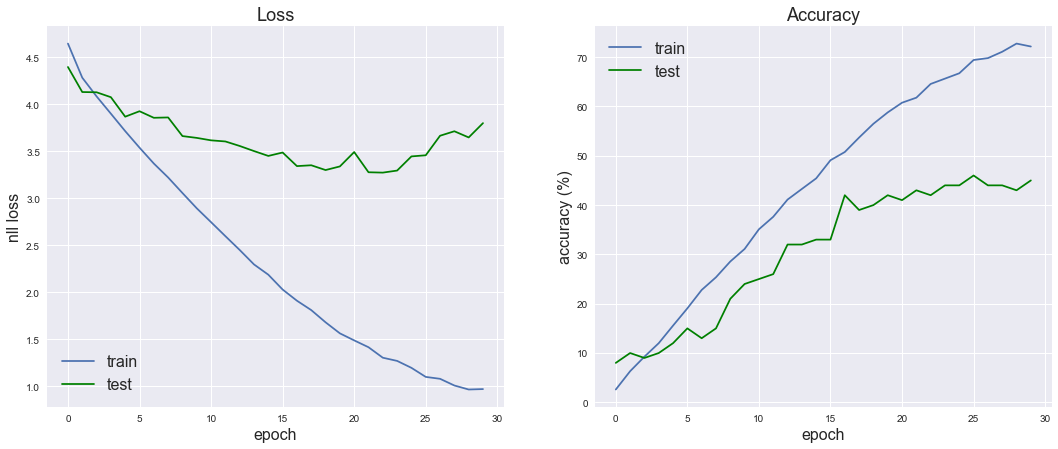

In [353]:
fig, ax = subplots(1, 2, figsize=(18,7))

ax[0].plot(losses['train'], label='train')
ax[0].plot(losses['test'], label='test', c='g')
ax[0].legend(loc='lower left', fontsize=16)
ax[0].grid(True)
ax[0].set_ylabel('nll loss', fontsize=16)
ax[0].set_xlabel('epoch', fontsize=16)
ax[0].set_title('Loss', fontsize=18);

ax[1].plot(100*np.array(accuracies['train']), label='train')
ax[1].plot(100*np.array(accuracies['test']), label='test', c='g')
ax[1].legend(loc='upper left', fontsize=16)
ax[1].grid(True)
ax[1].set_ylabel('accuracy (%)', fontsize=16)
ax[1].set_xlabel('epoch', fontsize=16)
ax[1].set_title('Accuracy', fontsize=18);

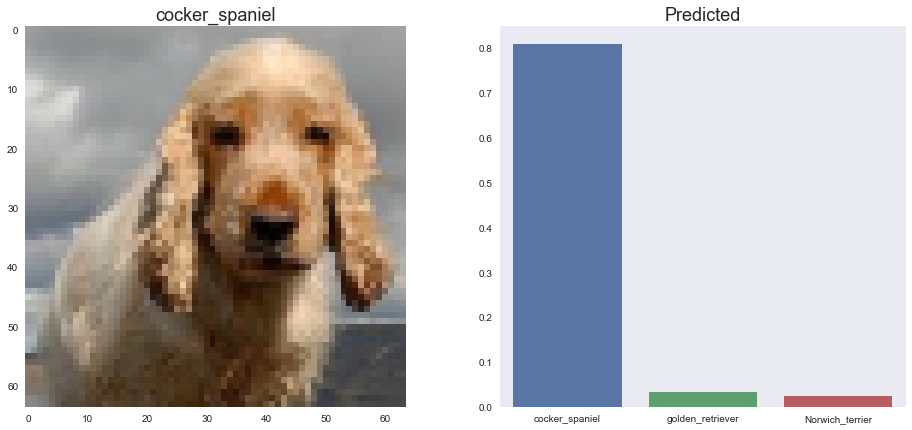

In [369]:
model.eval()

# Take image from test set and check the predicted probabilities.
fig, ax = subplots(1, 2, figsize=(16,7))

idx = 320
image, target = testset.dataset[idx]
ax[0].imshow(image.reshape(64,64,3)+0.5)
ax[0].set_title(breeds[target], fontsize=18);

pred = np.exp(model(image.reshape(-1,3,64,64)).detach().numpy())[0]
cutoff = pred > np.sort(pred)[-4]
sns.barplot(x=np.array(breed_category)[cutoff], y=pred[cutoff], ax=ax[1])
ax[1].set_title('Predicted', fontsize=18);

In [370]:
# Test some out-of-sample photos of my own dog who is a Maltese.
tests = []
for fname in ['mac1.jpg','mac2.jpg']:
    img = dogs.read_image(f'stanford-dogs-dataset/{fname}')
    img = cv2.resize(img, (dogs.IMG_WIDTH, dogs.IMG_HEIGHT), interpolation=cv2.INTER_AREA)
    tests.append(torch.tensor(img))

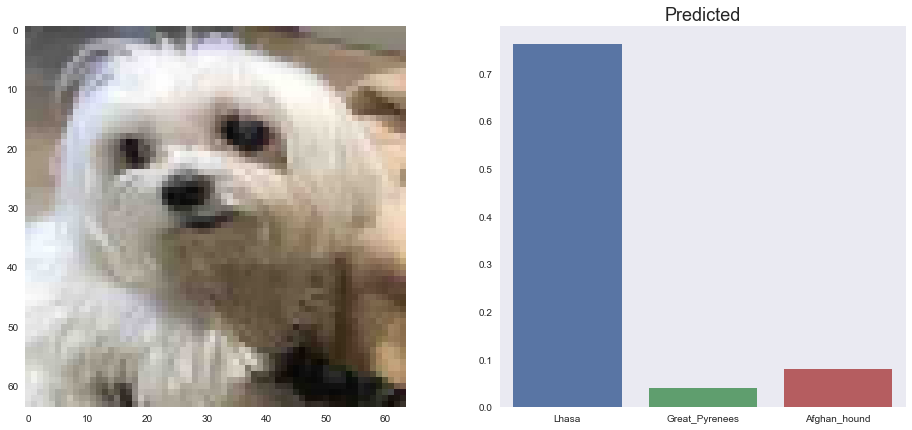

In [373]:
# Take image from test set and check the predicted probabilities.
fig, ax = subplots(1, 2, figsize=(16,7))

image = (tests[1] - 127.5)/255.0
ax[0].imshow(image.reshape(64,64,3)+0.5)

pred = np.exp(model(image.reshape(-1,3,64,64)).detach().numpy())[0]
cutoff = pred > np.sort(pred)[-4]
sns.barplot(x=np.array(breed_category)[cutoff], y=pred[cutoff], ax=ax[1])
ax[1].set_title('Predicted', fontsize=18);